In [1]:
%config IPCompleter.use_jedi=False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

## PCA

In [3]:
input_array = []
for img_name in sorted(os.listdir('./four_dataset/')):
    img = Image.open(os.path.join('./four_dataset/', img_name))
    img = np.array(img).reshape(-1)
    input_array.append(img)

In [4]:
input_array = np.array(input_array).T
input_array.shape

(784, 982)

In [5]:
def PCA(input_array, dim=2):
    # Normalize input array
    mu = np.mean(input_array, axis=1)
    zero_mean_input_array = input_array - np.array([mu for i in np.arange(input_array.shape[1])]).T
    
    # Use SVD to fine priciple components
    U, Sigma, V = np.linalg.svd(zero_mean_input_array)
    
    # Access top_dim priciple components
    reduced = U.T[:dim]@zero_mean_input_array
    
    # Reconstruction
    reconstructed = U[:,:dim]@reduced + np.array([mu for i in np.arange(input_array.shape[1])]).T
    
    return reconstructed

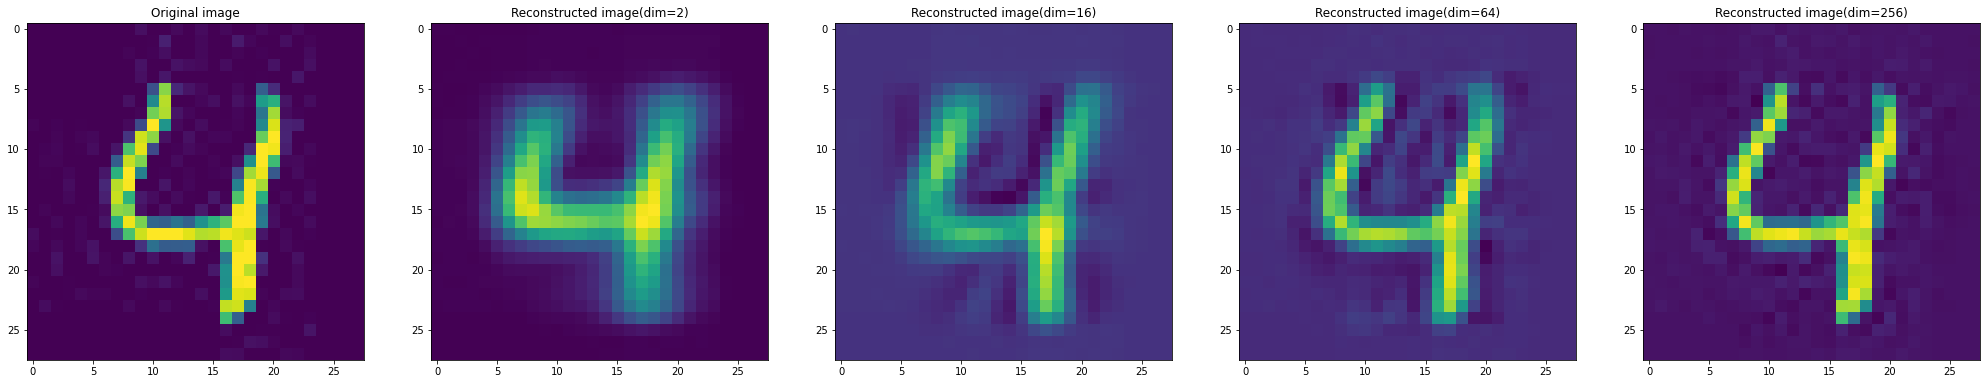

In [6]:
fig, axs = plt.subplots(1, 5, figsize=(35, 7))
axs[0].imshow(input_array[:,0].reshape(28,28))
axs[0].set_title('Original image')

for i, dim in enumerate([2,16,64,256]):
    reconstructed = PCA(input_array, dim=dim)
    axs[1+i].imshow(reconstructed[:,0].reshape(28,28))
    axs[1+i].set_title('Reconstructed image(dim='+str(dim)+')')
plt.show()

## NMF

In [7]:
from sklearn.preprocessing import normalize

In [8]:
input_array = []
for img_name in sorted(os.listdir('./mixture_dataset(0147)/')):
    img = Image.open(os.path.join('./mixture_dataset(0147)/', img_name))
    img = np.array(img).reshape(-1)
    input_array.append(img)

In [9]:
input_array = np.array(input_array).T
input_array.shape

(784, 1000)

In [29]:
def NMF(input_array, dim=4, num_iter = 3000, delta = 1e-5):
    V = input_array
    W = np.random.rand(V.shape[0], 4)
    H = np.random.rand(4, V.shape[1])

    for idx in range(num_iter):
        # Update H
        deno = (W.T@W@H)
        deno[deno==0] = delta
        numer = (W.T@V)
        for i in range(H.shape[0]):
            for j in range(H.shape[1]):
                H[i,j] = H[i,j]*numer[i,j]/deno[i,j]
        # Update W
        deno = (W@H@H.T)
        deno[deno==0] = delta
        numer = (V@H.T)
        for i in range(W.shape[0]):
            for j in range(W.shape[1]):
                W[i,j] = W[i,j]*numer[i,j]/deno[i,j]
                
        # To avoid NaN
        H = np.nan_to_num(H)
        W = np.nan_to_num(W)
        # Print Forbinous norm
        norm = np.linalg.norm(V - W@H, 'fro')
        if idx%100 == 0:
            print("Iter ", idx, ":", norm)
    return W, H

In [30]:
W, H = NMF(input_array, dim=4)

Iter  0 : 10688.910593140004
Iter  100 : 3034.0779751559494
Iter  200 : 2892.535952371718
Iter  300 : 2867.628881191446
Iter  400 : 2856.675292411885
Iter  500 : 2850.9520293660207
Iter  600 : 2847.1201857318756
Iter  700 : 2844.279805383303
Iter  800 : 2841.8977716916006
Iter  900 : 2840.726004305395
Iter  1000 : 2839.8338631049687
Iter  1100 : 2839.2426728449427
Iter  1200 : 2838.8142876895413
Iter  1300 : 2838.4194721716185
Iter  1400 : 2838.038104394433
Iter  1500 : 2837.7389415367534
Iter  1600 : 2837.4528664756185
Iter  1700 : 2837.2989016980787
Iter  1800 : 2837.228012894245
Iter  1900 : 2837.1578313828927
Iter  2000 : 2837.055737286793
Iter  2100 : 2837.0013543939726
Iter  2200 : 2836.9544926818735
Iter  2300 : 2836.894761488773
Iter  2400 : 2836.850847649245
Iter  2500 : 2836.831161337031
Iter  2600 : 2836.8096906315386
Iter  2700 : 2836.7777300484317
Iter  2800 : 2836.7617595338907
Iter  2900 : 2836.753717953548


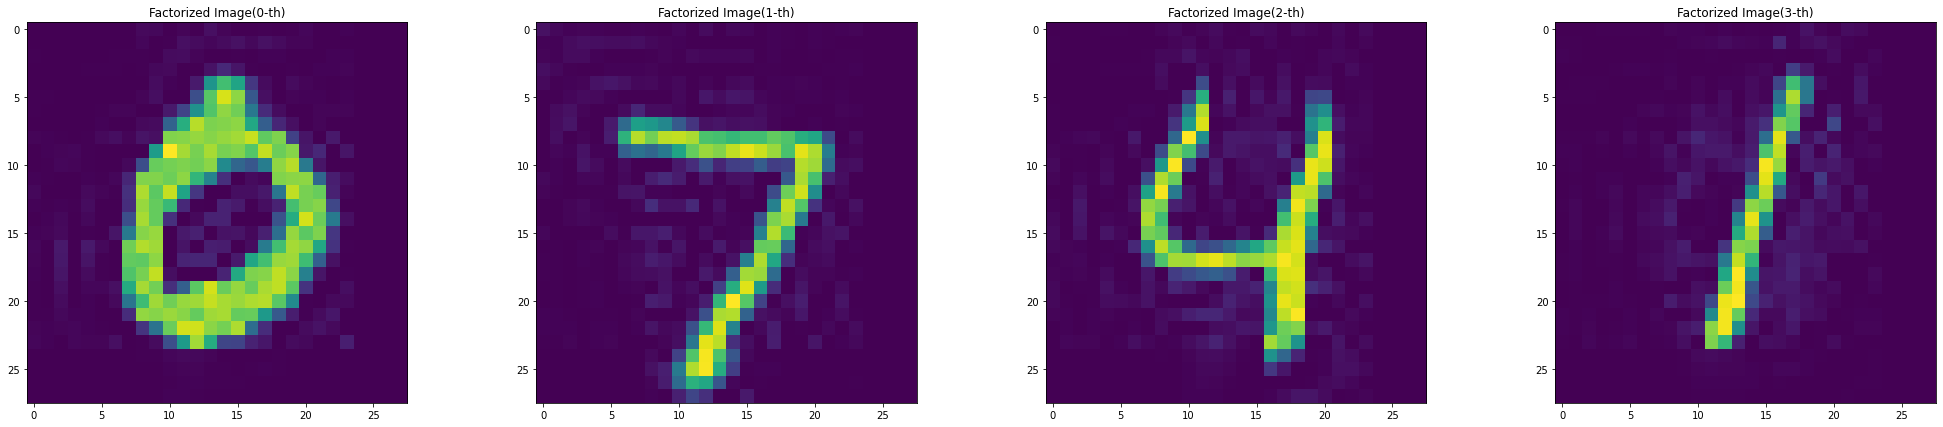

In [36]:
fig, axs = plt.subplots(1, 4, figsize=(35, 7))

for i in range(W.shape[1]):
    axs[i].imshow(W[:,i].reshape(28,28))
    axs[i].set_title('Factorized Image('+str(i)+'-th)')
plt.show()